In [57]:
# ANCOVA using pingouin
import pandas as pd
df = pd.read_csv("INF2178_A3_data.csv")
df.head(4)

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2


In [58]:
%pip install dfply
from dfply import *
# Summary statistics for dependent variable springreadingscore
df >> group_by(X.incomegroup) >> summarize(n=X['springreadingscore'].count(), mean=X['springreadingscore'].mean(), std=X['springreadingscore'].std())


,incomegroup,n,mean,std
0,1,4729,43.665077,12.004821
1,2,3726,48.009450,13.505020
2,3,3478,52.206880,16.450153


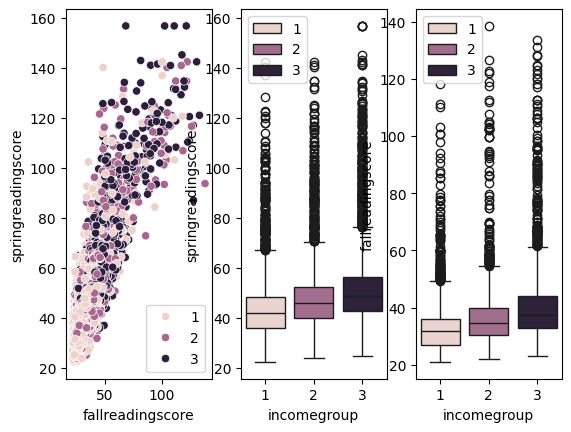

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=3)
sns.scatterplot(data=df, x="fallreadingscore", y="springreadingscore", hue=df.incomegroup.tolist(), ax=axs[0])
sns.boxplot(data=df, x="incomegroup", y="springreadingscore", hue=df.incomegroup.tolist(), ax=axs[1])
sns.boxplot(data=df, x="incomegroup", y="fallreadingscore", hue=df.incomegroup.tolist(), ax=axs[2])
plt.show()

In [39]:
# RQ1:

%pip install pingouin
from pingouin import ancova
ancova_result = ancova(data=df, dv='springreadingscore', covar='fallreadingscore', between='incomegroup')
print(ancova_result)

             Source            SS     DF             F     p-unc      np2
0       incomegroup  5.131201e+02      2      4.055660  0.017348  0.00068
1  fallreadingscore  1.547042e+06      1  24455.397576  0.000000  0.67214
2          Residual  7.546256e+05  11929           NaN       NaN      NaN


In [60]:
import numpy as np

# Create data
data = pd.DataFrame({'incomegroup': np.repeat(['1', '2', '3'], 4),
                     'fallreadingscore': [67, 88, 75, 85, 92, 77, 74, 88, 91, 88, 82, 80],
                     'springreadingscore': [77, 89, 74, 69, 88, 93, 94, 90, 85, 81, 83, 79]})
# View data
data

,incomegroup,fallreadingscore,springreadingscore
0,1,67,77
1,1,88,89
2,1,75,74
3,1,85,69
4,2,92,88
5,2,77,93
6,2,74,94
7,2,88,90
8,3,91,85
9,3,88,81


In [61]:
from pingouin import ancova

data = pd.DataFrame({'incomegroup': np.repeat(['1', '2', '3'], 4),
                     'fallreadingscore': [67, 88, 75, 85, 92, 77, 74, 88, 91, 88, 82, 80],
                     'springreadingscore': [77, 89, 74, 69, 88, 93, 94, 90, 85, 81, 83, 79]})

ancova(data=data, dv='springreadingscore', covar='fallreadingscore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,387.510992,2,6.005703,0.025542,0.600228
1,fallreadingscore,1.404669,1,0.043540,0.839927,0.005413
2,Residual,258.095331,8,NaN,NaN,NaN


In [62]:
# ANCOVA using statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the data for the ANCOVA
df_sm = pd.DataFrame({'springreadingscore': df['springreadingscore'],
                      'incomegroup': df['incomegroup'],
                      'fallreadingscore': df['fallreadingscore']})

# Perform the ANCOVA
model = ols('springreadingscore ~ incomegroup + fallreadingscore', data=df_sm).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     springreadingscore   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                 1.339e+04
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:51:11   Log-Likelihood:                -41675.
No. Observations:               11933   AIC:                         8.336e+04
Df Residuals:                   11930   BIC:                         8.338e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.3272      0.280  

In [63]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

np.random.seed(123)
# Generate data
age_group1 = np.random.normal(loc=40, scale=10, size=50)
age_group2 = np.random.normal(loc=40, scale=10, size=50)
# Generate spring reading scores
springreadingscore_group1 = np.random.normal(loc=75, scale=10, size=50)
springreadingscore_group2 = np.random.normal(loc=80, scale=10, size=50)
# Combine data into a DataFrame
df = pd.DataFrame({
    'age': np.concatenate((age_group1, age_group2)),
    'fallreadingscore': np.concatenate((springreadingscore_group1, springreadingscore_group2)),
    'springreadingscore': np.concatenate((springreadingscore_group1, springreadingscore_group2)),
    'incomegroup': np.concatenate((np.ones(50), np.zeros(50)))
})

# Fit ANCOVA model
model = sm.formula.ols('springreadingscore ~ incomegroup + age + fallreadingscore', data=df).fit()
# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     springreadingscore   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.576e+29
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:51:13   Log-Likelihood:                 2860.4
No. Observations:                 100   AIC:                            -5713.
Df Residuals:                      96   BIC:                            -5702.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -4.974e-14   8.48e-14  

In [64]:
# Fit ANCOVA model with interaction term
model_interaction = sm.formula.ols('springreadingscore ~ incomegroup * age + fallreadingscore', data=df).fit()
# Print model summary
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:     springreadingscore   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.842e+29
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:51:15   Log-Likelihood:                 2890.5
No. Observations:                 100   AIC:                            -5771.
Df Residuals:                      95   BIC:                            -5758.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.553e-14   6.81e-14  

In [65]:
# RQ2:
correlation = df['fallreadingscore'].corr(df['springreadingscore'])
print("Correlation between fall and spring reading scores:", correlation)


Correlation between fall and spring reading scores: 1.0


In [66]:
# RQ3: ANCOVA for reading scores
model_reading = ols('springreadingscore ~ C(incomegroup) + fallreadingscore', data=df).fit()
ancova_reading = sm.stats.anova_lm(model_reading, typ=2)
print(ancova_reading)


                        sum_sq    df             F        PR(>F)
C(incomegroup)    4.913770e-26   1.0  7.926737e+01  3.124999e-14
fallreadingscore  9.217664e+03   1.0  1.486964e+31  0.000000e+00
Residual          6.013013e-26  97.0           NaN           NaN


In [67]:
# RQ4
model_reading_age = ols('springreadingscore ~ C(incomegroup) + fallreadingscore + age', data=df).fit()
ancova_reading_age = sm.stats.anova_lm(model_reading_age, typ=2)
print(ancova_reading_age)


                        sum_sq    df             F    PR(>F)
C(incomegroup)    6.488717e-26   1.0  5.598574e+00  0.019984
fallreadingscore  9.214767e+03   1.0  7.950657e+29  0.000000
age               1.411447e-27   1.0  1.217820e-01  0.727874
Residual          1.112635e-24  96.0           NaN       NaN
